# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.widgets as mwidgets
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
from IPython.display import HTML, Image

%matplotlib notebook

<IPython.core.display.Javascript object>


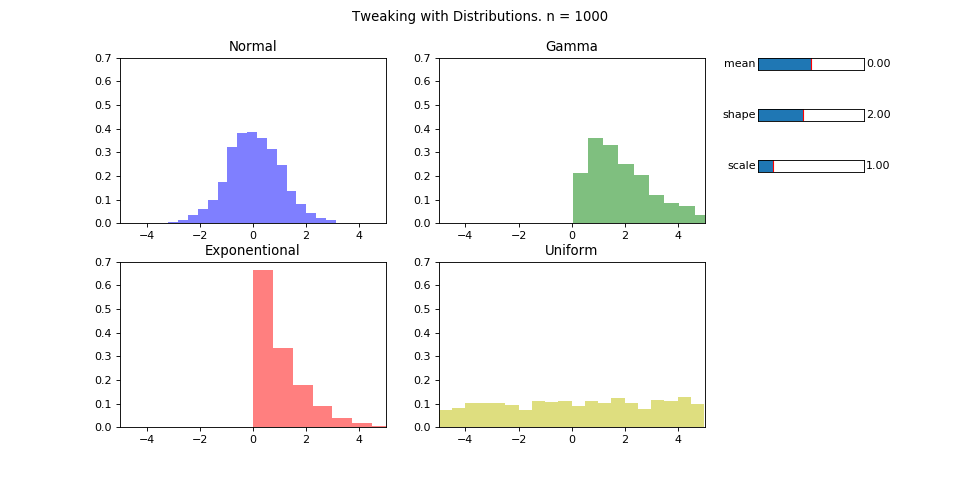

In [9]:
fig1 = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

gspec = gridspec.GridSpec(8, 5)
ax1 = plt.subplot(gspec[0:4,0:2])
ax2 = plt.subplot(gspec[0:4,2:4], sharey=ax1)
ax3 = plt.subplot(gspec[4:8,0:2], sharey=ax1)
ax4 = plt.subplot(gspec[4:8,2:4], sharey=ax1)
param_1 = plt.subplot(gspec[0,4])
param_2 = plt.subplot(gspec[1,4])
param_3 = plt.subplot(gspec[2,4])

plt.gca().set_ylim(bottom=0.0, top=0.7)

n = 10
g_loc=0
g_shape=2
g_scale = 1
x1 = np.random.normal(g_loc, g_scale, 10000)
x2 = np.random.gamma(g_shape, g_scale, 10000)
x3 = np.random.exponential(g_scale, 10000)
x4 = np.random.uniform(-5,5, 10000)

def plot_sample(n, loc, shape, scale):
    x1 = np.random.normal(loc, scale, 10000)
    x2 = np.random.gamma(shape, scale, 10000)
    x3 = np.random.exponential(scale, 10000)
    x4 = np.random.uniform(-5,5, 10000)
    
    axes = [ax1,ax2,ax3,ax4]
    dists = [x1, x2, x3, x4]
    titles = ['Normal', 'Gamma', 'Exponentional', 'Uniform']
    colors = 'bgry'
    
    for x in range(len(axes)):
        axes[x].cla()
        axes[x].hist(dists[x][:n], normed=True, bins=20, alpha=0.5, color=colors[x])
        axes[x].set_title(titles[x])
        axes[x].set_ylim(0.0, 0.7)
        axes[x].set_xlim(-5, 5)
    
    fig1.subplots_adjust(hspace=3, wspace=0.5)
    fig1.suptitle('Tweaking with Distributions. n = {}'.format(n))

def loc_changed(loc):
    g_loc = loc
    plot_sample(1000, g_loc, g_shape, g_scale)
  
def shape_changed(shape):
    g_shape = shape
    plot_sample(1000, g_loc, g_shape, g_scale)

def scale_changed(scale):
    g_scale = scale
    plot_sample(1000, g_loc, g_shape, g_scale)
    
slider_loc = mwidgets.Slider(param_1, 'mean', -4, 4, valinit=g_loc, valfmt='%1.2f', closedmin=True, closedmax=True, slidermin=None, slidermax=None, dragging=True)
slider_loc.on_changed(loc_changed)

slider_shape = mwidgets.Slider(param_2, 'shape', 0.5, 4, valinit=g_shape, valfmt='%1.2f', closedmin=True, closedmax=True, slidermin=None, slidermax=None, dragging=True)
slider_shape.on_changed(shape_changed)

slider_scale = mwidgets.Slider(param_3, 'scale', 0.5, 4, valinit=g_scale, valfmt='%1.2f', closedmin=True, closedmax=True, slidermin=None, slidermax=None, dragging=True)
slider_scale.on_changed(scale_changed)

plot_sample(1000, g_loc, g_shape, g_scale)